In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
# import coin datas
import yfinance as yf
xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers = "XMR-USD",
                     start = "2022-09-07",
                     end = "2023-09-09" , 
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [3]:
df_xmr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-07,144.950851,152.059586,141.929382,149.232574,149.232574,98033777
2022-09-08,149.233353,152.426529,147.767471,152.175339,152.175339,82798120
2022-09-09,152.175949,159.720169,151.765671,159.720169,159.720169,103665193
2022-09-10,160.002502,161.677124,157.358948,157.581055,157.581055,76903926
2022-09-11,157.612946,159.213715,154.800797,158.860352,158.860352,70199114


In [4]:
y = []
for i in range(1,len(df_xmr)) : 
    y.append(df_xmr.iloc[i]["Close"] > df_xmr.iloc[i-1]["Close"])
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score , recall_score , precision_score
reg = LinearRegression()

In [5]:
df_xmr_test = yf.download(tickers = "XMR-USD",
                     start = "2023-09-04",
                     end = "2023-10-07" , 
                     interval = "1d")
y_test = []
for i in range(len(df_xmr_test)) : 
    y_test.append(df_xmr_test.iloc[i]["Close"] > df_xmr_test.iloc[i-1]["Close"])

[*********************100%%**********************]  1 of 1 completed


In [8]:
n_days = 15
## arrays that save train data scores for different days 
f1_train = []
recall_train = []
precision_train = []
## arrays that save validation data scores for days 
f1_val = []
recall_val = []
precision_val = []
## calc scores for different days 
for k in range(1,n_days) : 
    x = []
    ## make input data ( N days before )
    for i in range(k,len(df_xmr)) : 
        f = []
        for j in range(k) : 
            f.append(df_xmr.iloc[i-j]["Close"])
        x.append(f)
    ## make train and validation data and train model
    x_tr , x_val , y_tr , y_val = train_test_split(x,y[k-1:],test_size = 0.3 , random_state = 42)
    reg.fit(x_tr , y_tr)
    # predict train data and calc scores 
    y_1_pred = reg.predict(x_tr)
    y_1_pred = y_1_pred > 0
    f = f1_score(y_true=y_tr , y_pred = y_1_pred)
    r = recall_score(y_true=y_tr , y_pred = y_1_pred)
    p = precision_score(y_true=y_tr , y_pred = y_1_pred)
    # predict valiadtion data and calc scores
    y_pred = reg.predict(x_val)
    y_pred = y_pred > 0
    f_sc = f1_score(y_true=y_val , y_pred = y_pred)
    r_sc = recall_score(y_true=y_val , y_pred = y_pred)
    p_sc = precision_score(y_true=y_val , y_pred = y_pred)
    ## add scores to arrays
    f1_train.append(f)
    recall_train.append(r)
    precision_train.append(p)
    f1_val.append(f_sc)
    recall_val.append(r_sc)
    precision_val.append(p_sc)
    print(f"day : {k}")
    print(f"train -> f1 : {f} , recall : {r} , precision : {p}")
    print(f"validation -> f1 : {f_sc} , recall : {r_sc} , precision : {p_sc}")

day : 1
train -> f1 : 0.6972010178117048 , recall : 1.0 , precision : 0.53515625
validation -> f1 : 0.7428571428571429 , recall : 1.0 , precision : 0.5909090909090909
day : 2
train -> f1 : 0.7253333333333333 , recall : 1.0 , precision : 0.5690376569037657
validation -> f1 : 0.7692307692307693 , recall : 1.0 , precision : 0.625
day : 3
train -> f1 : 0.7611548556430447 , recall : 1.0 , precision : 0.614406779661017
validation -> f1 : 0.6832298136645962 , recall : 1.0 , precision : 0.5188679245283019
day : 4
train -> f1 : 0.7368421052631579 , recall : 1.0 , precision : 0.5833333333333334
validation -> f1 : 0.7272727272727273 , recall : 1.0 , precision : 0.5714285714285714
day : 5
train -> f1 : 0.731578947368421 , recall : 1.0 , precision : 0.5767634854771784
validation -> f1 : 0.7453416149068323 , recall : 1.0 , precision : 0.594059405940594
day : 6
train -> f1 : 0.7277628032345014 , recall : 1.0 , precision : 0.5720338983050848
validation -> f1 : 0.7682926829268292 , recall : 1.0 , preci

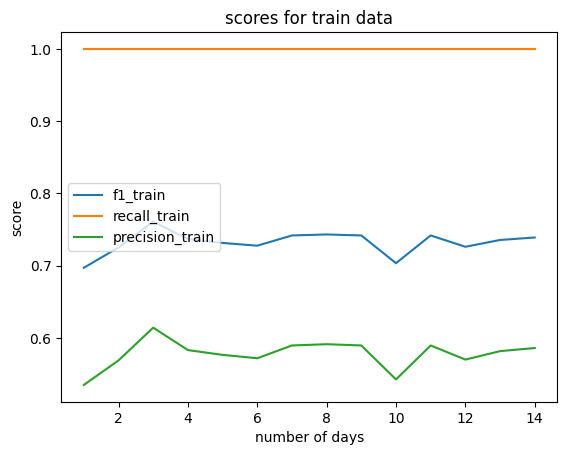

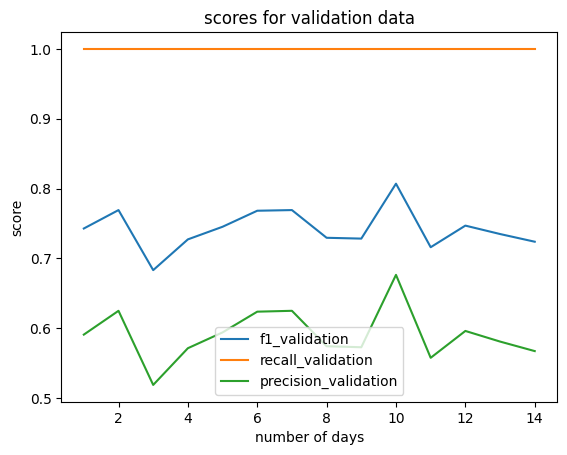

In [9]:
# plot scores for train data
plt.title("scores for train data")
plt.plot([i for i in range(1,n_days)] , f1_train , label = "f1_train")
plt.plot([i for i in range(1,n_days)] , recall_train , label = "recall_train")
plt.plot([i for i in range(1,n_days)] , precision_train , label = "precision_train")
plt.xlabel("number of days")
plt.ylabel("score")
plt.legend()
plt.show()
## plot scores for validation data
plt.title("scores for validation data")
plt.plot([i for i in range(1,n_days)] , f1_val , label = "f1_validation")
plt.plot([i for i in range(1,n_days)] , recall_val , label = "recall_validation")
plt.plot([i for i in range(1,n_days)] , precision_val , label = "precision_validation")
plt.xlabel("number of days")
plt.ylabel("score")
plt.legend()
plt.show()

In [7]:
## choose best day using scores 
best_day = 10

In [63]:
## make input and labels for final model
x_t = []
x = []
# input for train and validation
for i in range(best_day,len(df_xmr)) : 
    f = []
    for j in range(best_day) : 
        f.append(df_xmr.iloc[i-j]["Close"])
    x.append(f)
# input for test data 
for i in range(best_day,len(df_xmr_test)) : 
        f_t = []
        for j in range(best_day) : 
            f_t.append(df_xmr_test.iloc[i-j]["Close"])
        x_t.append(f_t)
# make final train and validation data
x_tr , x_val , y_tr , y_val = train_test_split(x,y[best_day-1:],test_size = 0.3 , random_state = 42)
reg.fit(x_tr , y_tr)
# predict test data and calc scores 
y_t = reg.predict(x_t)
y_t = y_t > 0
f_t = f1_score(y_true=y_test[best_day:] , y_pred = y_t )
r_t = recall_score(y_true=y_test[best_day:] , y_pred = y_t )
p_t = precision_score(y_true=y_test[best_day:] , y_pred = y_t )
print(f"day : {best_day}")
print(f"test -> f1 : {f_t} , recall : {r_t} , precision : {p_t}\n")

day : 10
test -> f1 : 0.7567567567567568 , recall : 1.0 , precision : 0.6086956521739131

